In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [127]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [128]:
df.shape

(200, 5)

In [129]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [131]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [132]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

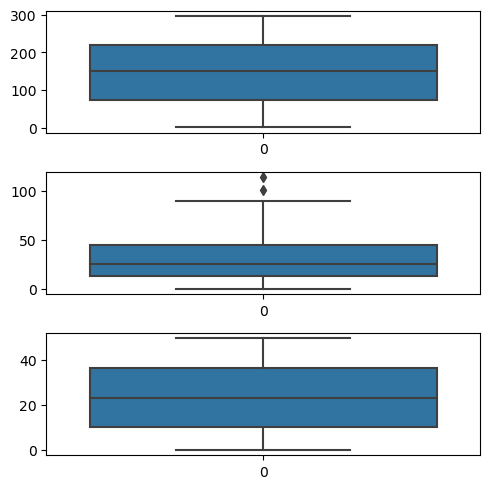

In [133]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1=sns.boxplot(df['TV'],ax = axs[0])
plt2=sns.boxplot(df['Newspaper'],ax = axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

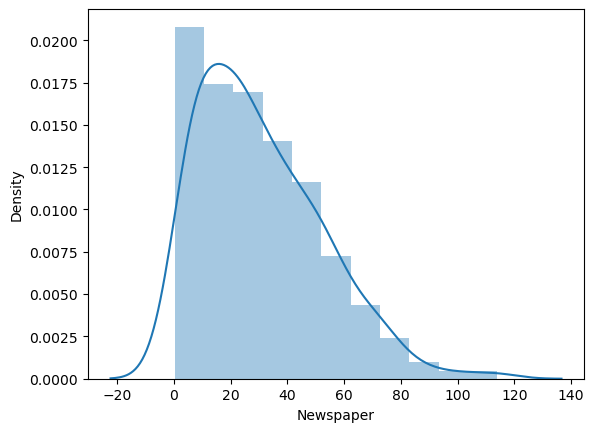

In [134]:
sns.distplot(df['Newspaper'])

In [135]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [136]:
lower_bridge=df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [138]:
data=df.copy()

In [139]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot:>

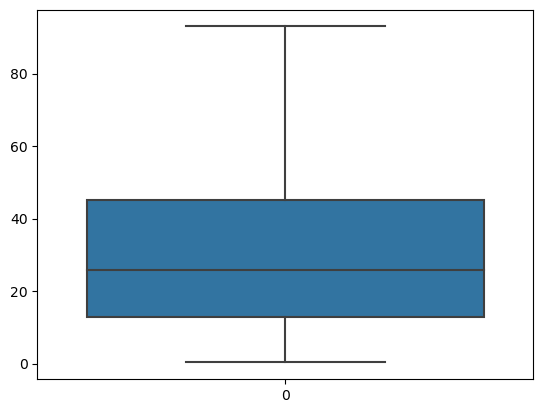

In [141]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:>

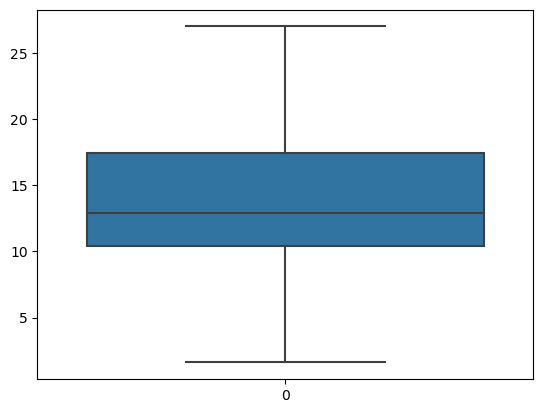

In [142]:
sns.boxplot(data['Sales'])

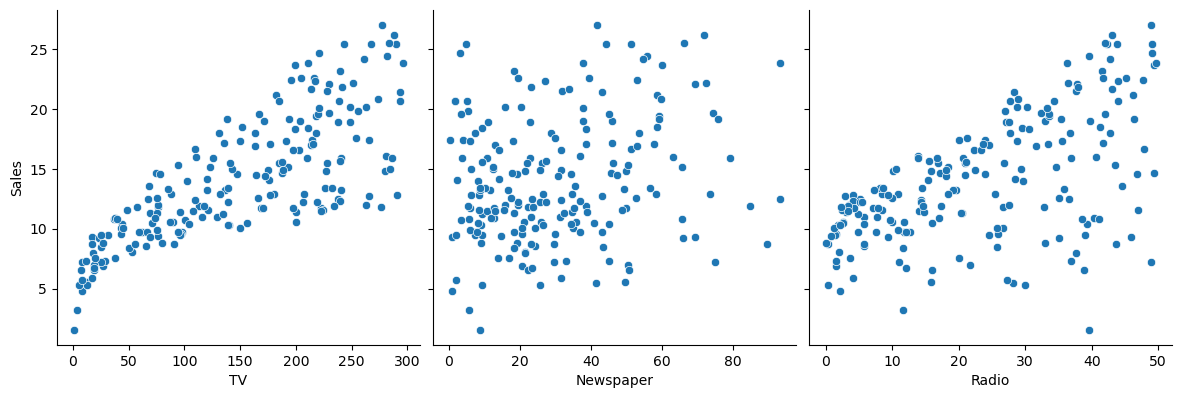

In [143]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

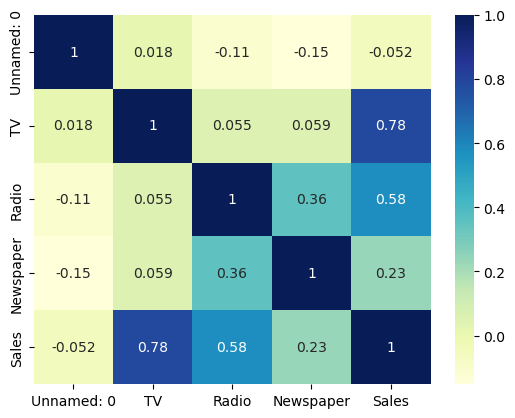

In [144]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [147]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [150]:
print(important_features)

['TV', 'Radio', 'Sales']


In [151]:
x=data['TV']
y=data['Sales']

In [152]:
x = x.values.reshape(-1,1)

In [153]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [154]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [155]:
print(x.shape,y.shape)

(200, 1) (200,)


In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [157]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [158]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [159]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [160]:
knn_train_pred=knn.predict(x_train)

In [161]:
knn_test_pred=knn.predict(x_test)

In [162]:
print(knn_train_pred,knn_test_pred)

[14.84 11.72 14.92 17.76 15.28 16.88 10.74 12.44 15.54 21.3  17.46  8.18
  7.28 15.44  9.86  7.78 18.18 16.74 15.38 19.24  9.7   9.38 21.3  11.28
 12.44  6.06 12.6  14.2  16.2   8.18  5.64 10.94  7.02 16.2  16.34 17.76
 17.6  20.38 14.66 12.54 15.28 13.28  7.78 17.46 15.28  7.78 11.28 17.76
 19.88 14.88 12.9  15.28 10.5   9.72  9.86 10.94 15.54  8.64 19.24  9.86
 16.34 21.3   8.64 16.88  9.34  8.64 18.92 16.34 13.74 11.28 15.5  19.28
 16.34  5.64 10.74 16.1  13.74 15.5  19.04 16.74  9.72 20.38  7.78 11.72
 16.74 15.2   8.64 18.74 12.3   9.34  5.64 11.24 12.16 12.16 13.24 15.48
 11.72 11.94 19.04 16.2  18.62 15.38 19.24  7.02 13.74 11.28 19.5  12.54
 16.88 16.2  15.48 12.9  14.2  11.72 19.68 18.5   8.64  7.02  9.72 11.72
 19.04 12.54  4.52 16.64 13.24 10.5  11.36 14.2  15.44 13.74 14.92  4.52
 19.28 19.24] [19.88 10.46 16.2  16.66 16.2  15.38 16.88 16.28 16.36 16.84 11.72 18.18
 13.24  9.68 16.88 19.24  5.64 11.28 18.5  16.36 17.76 15.5  12.82 17.6
 11.72 12.12 13.24 16.1  19.5  18.62 1

In [163]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [164]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"K-Nearest-Neighbors","Train_R2":r2_train,"Test_R2":r2,"Test_RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.530469196187038
RMSE: 3.828995437527454


In [165]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test_R2,Test_RMSE,Train_R2
0,K-Nearest-Neighbors,NaN,NaN,NaN,0.13576,0.530469,3.828995,0.666229


In [166]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [168]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [169]:
print(svr_train_pred,svr_test_pred)

[12.87845299 10.84084905 14.88569689 17.00012362 14.59998445 17.15146157
 10.42121152 12.50738452 17.11298731 17.08641146 16.0688798   8.43206552
  7.95524659 13.09171819  9.0143606   8.07709796 17.13856324 17.15360655
 15.13297345 15.68513296  9.18949719 10.04908488 17.05759332 10.49607093
 12.55280234  7.84711331 12.39023379 13.97259511 16.03501713  8.46127394
  7.81789901 11.05942097  8.12980924 16.26930621 15.76570589 16.94618802
 16.7289209  16.7842426  13.29981575 11.3699346  14.71480417 13.3708493
  8.06752796 16.0968003  14.65480063  8.09981556 10.46620397 16.96147269
 16.91395675 14.21346976 12.18172851 14.55032665  9.27598732  9.46133777
  8.9505329  10.96739762 17.13052821  8.31163799 15.71461998  8.94078022
 15.62097019 17.09133877  8.38294857 17.15146157  9.87266583  8.36284971
 16.00038402 15.62097019 13.47265847 10.53572878 17.09301048 16.89701993
 15.76093313  7.82803768 10.38103183 13.25843562 13.51562135 17.07886022
 16.22972094 17.15318867  9.54958316 16.78133044  8.

In [170]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train_R2":r2_train,"Test_R2":r2,"Test_RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.47839861869439393
RMSE: 4.035730624934725


In [171]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test_R2,Test_RMSE,Train_R2
0,K-Nearest-Neighbors,NaN,NaN,NaN,0.135760,0.530469,3.828995,0.666229
1,Support Vector Machine,NaN,NaN,NaN,0.103683,0.478399,4.035731,0.582082


In [173]:
import statsmodels.api as sm

In [175]:
x_train_constant=sm.add_constant(x_train)

In [176]:
model=sm.OLS(y_train,x_train_constant).fit()

In [177]:
model.params

const    7.462344
x1       0.044010
dtype: float64

In [178]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     201.9
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.21e-28
Time:                        07:05:08   Log-Likelihood:                -342.03
No. Observations:                 134   AIC:                             688.1
Df Residuals:                     132   BIC:                             693.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4623      0.508     14.704      0.0

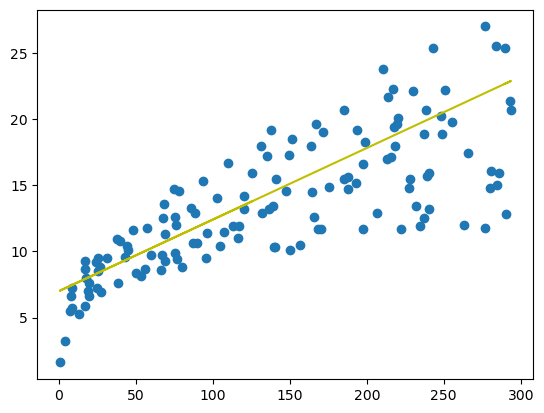

In [179]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train,'y')
plt.show()

In [180]:
y_train_pred=model.predict(x_train_constant)
res = (y_train-y_train_pred)
res


118    2.905604
191   -0.885096
177   -3.252839
100   -5.550160
171   -0.201983
         ...   
186   -3.301734
173   -3.173621
155   -4.442784
69     5.296296
98     5.187970
Name: Sales, Length: 134, dtype: float64

In [181]:
y_train_pred

array([12.99439603, 10.78509584, 14.95283943, 17.25015956, 14.70198264,
       18.02913592, 10.40661015, 12.56749938, 17.58903628, 18.41202261,
       19.97437633,  8.64181059,  8.03887408, 13.23204984,  9.20073713,
        8.21931494, 18.16556681, 17.94551699, 15.16848826, 20.383669  ,
        9.35477201, 10.08533741, 18.50444353, 10.47262509, 12.62031134,
        7.84523024, 12.43106849, 14.12985311, 15.98707359,  8.67261757,
        7.78361629, 10.99194267,  8.28973088, 16.22472739, 15.7318158 ,
       17.13573365, 19.15139   , 16.85847088, 13.45650066, 11.30001242,
       14.80320556, 13.5313176 ,  8.20611195, 19.94356936, 14.7503936 ,
        8.25012191, 10.44621912, 17.16654062, 17.0741197 , 14.35430392,
       12.18901369, 14.65797267,  9.42958895,  9.58802482,  9.14352418,
       10.90392274, 17.67705621,  8.5097807 , 20.35286202,  9.13472219,
       15.5997859 , 18.39441862,  8.58899863, 18.02913592,  9.93570353,
        8.56699365, 20.04919327, 15.5997859 , 13.63694151, 10.50

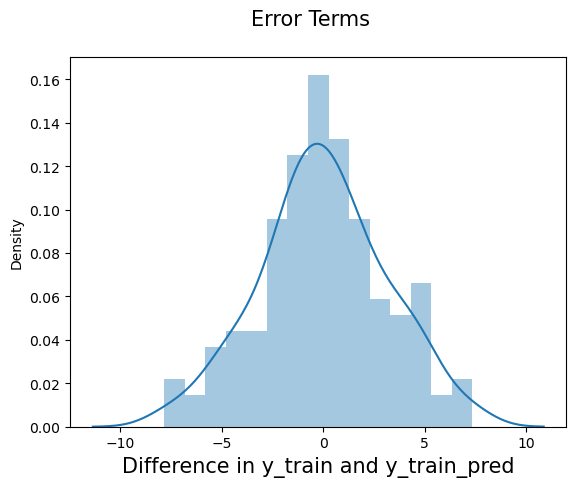

In [183]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize = 15)
plt.show()

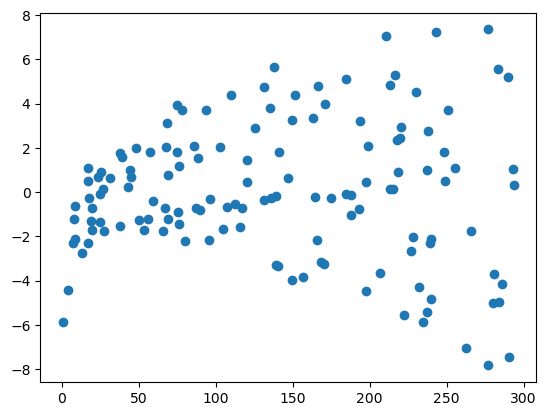

In [184]:
plt.scatter(x_train,res)
plt.show()

In [190]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [191]:
y_pred

array([17.0785207 , 10.20416431, 16.06189053, 16.37436127, 16.2159254 ,
       15.05406235, 18.01593293, 15.49856299, 15.25210719, 17.39979343,
       10.82470481, 18.09955186, 12.87997013,  9.08631123, 18.02033393,
       20.50689689,  7.84082925, 10.56944702, 16.73524298, 15.25210719,
       17.25015956, 17.49661535, 13.75136742, 19.20860296, 10.69267491,
       11.74011206, 12.7875492 , 13.37288172, 16.91128283, 18.63207243,
       16.98609977,  8.04327508,  8.28532988, 18.96214716, 19.13378602,
       17.15773863, 14.64917068, 12.29463761, 16.25553437, 19.84674743,
       15.75382078, 11.88094394, 16.25553437, 12.33424657, 11.4408443 ,
       15.41934505, 19.02376111, 16.68683202, 13.1572329 , 13.58853055,
       16.56360412, 16.44477721, 19.50787071,  7.97726013, 20.11960921,
       17.5626303 ,  7.69999736, 15.87264768, 11.75331505, 11.60808217,
        8.72102853, 15.19489424, 10.77629385, 17.3205755 ,  9.359173  ,
       16.48438618])

In [194]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [196]:
np.sqrt(mean_squared_error (y_test,y_pred))

3.5444597046909623

In [197]:
r2=r2_score(y_test,y_pred)
r2

0.5976588260367641

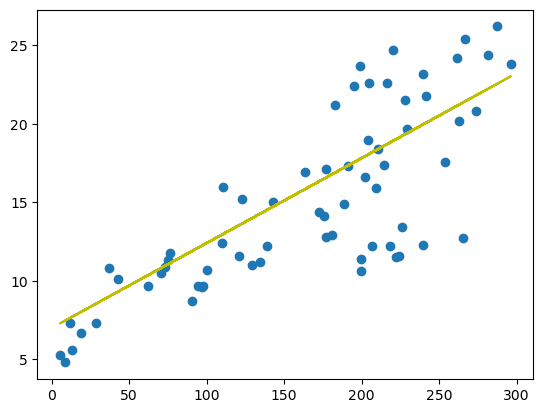

In [198]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()